In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
titanic_train = pd.read_csv('/content/train.csv')
titanic_test = pd.read_csv('/content/test.csv')

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


drawing plots to have more information about the dataset

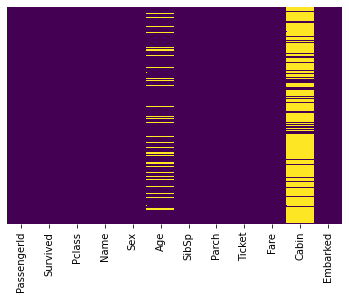

In [ ]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# removing null values

we can see that alot of age and cabin info are missing
so we need to look further into them inorder to see how they affect the survival rate

first we binarize cabin so that: 
having cabin information=1
not having cabin information=0

In [ ]:
#binarizing the 'Cabin' coloumn in train and test data set

titanic_train['Cabin']=(titanic_train['Cabin'].notnull()).astype('int')
titanic_test['Cabin']=(titanic_test['Cabin'].notnull()).astype('int')
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


We want to fill in missing age data.
age is probably related to passenger class, we will find the realtionship using a boxplot

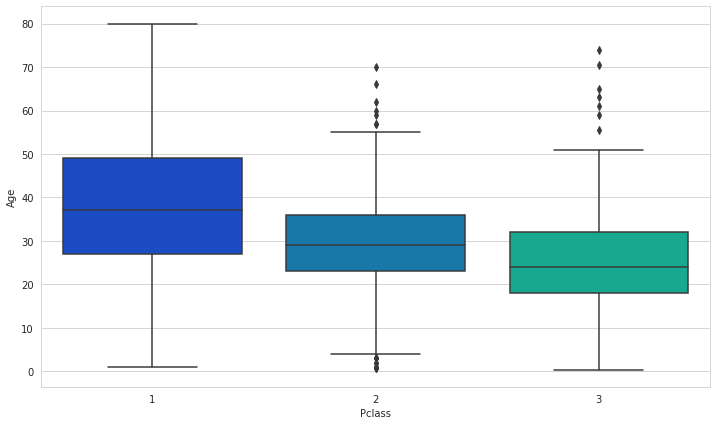

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train,palette='winter')

We can see that passengers in the higher classes tend to be older so we'll use these average age values to impute based on Pclass for Age.
So we'll fil la class1 passenger's age with 37, a class2 passenger's age with 29 and a class3 passenger's age with 24

In [ ]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

applying the function

In [ ]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age,axis=1)

after removing the null values from Age and Cabin,let's check the heatmap again

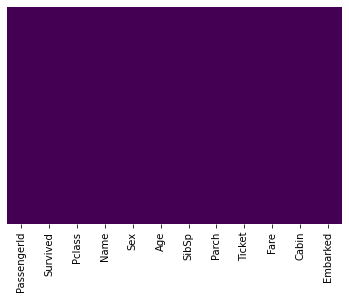

In [ ]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

removing null values form Fare by guessing the fare using the Pclass

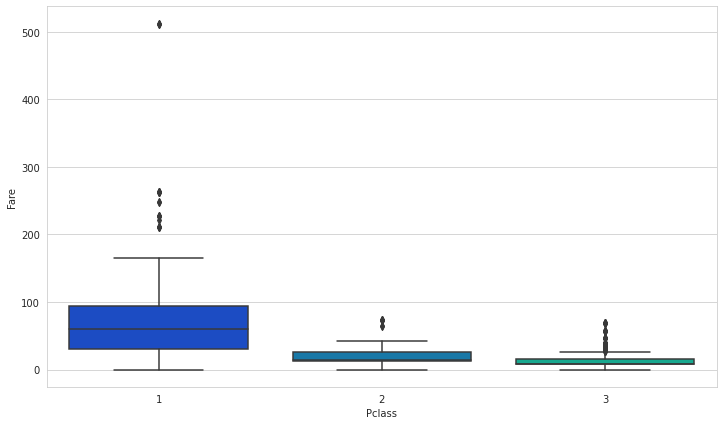

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=titanic_train,palette='winter')

In [ ]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 60
        elif Pclass == 2:
            return 15
        else:
            return 10
    else:
        return Fare

In [ ]:
titanic_train['Fare'] = titanic_train[['Fare','Pclass']].apply(impute_fare,axis=1)
titanic_test['Fare'] = titanic_test[['Fare','Pclass']].apply(impute_fare,axis=1)


now we need to see how to guess the null values in Embarked

I used countplots of embarked with the other features after mapping embarked values with integers and I can conclude that replacin null values in Embaerked with S is good option

In [ ]:
titanic_train["Embarked"].fillna("S", inplace = True) 
titanic_test["Embarked"].fillna("S", inplace = True)

# **now we need to convert the categorical features**

in the 'Sex' coloumn,we replace male with 0 and female with 1

In [ ]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0,'female': 1})
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 0,'female': 1})

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


in the 'Embarked' coloumn we replace Q with 0,S with 1 and C with 2

In [ ]:
mymap = {'Q':0, 'S':1, 'C':2}

#titanic_train['Embarked']=titanic_train['Embarked'].applymap(lambda s: mymap.get(s) if s in mymap else s)
#titanic_test['Embarked']=titanic_test['Embarked'].applymap(lambda t: mymap.get(t) if t in mymap else t)
titanic_train['Embarked']=titanic_train['Embarked'].replace(to_replace="Q",value="0")
titanic_train['Embarked']=titanic_train['Embarked'].replace(to_replace="S",value="1")
titanic_train['Embarked']=titanic_train['Embarked'].replace(to_replace="C",value="2")
titanic_test['Embarked']=titanic_test['Embarked'].replace(to_replace="Q",value="0")
titanic_test['Embarked']=titanic_test['Embarked'].replace(to_replace="S",value="1")
titanic_test['Embarked']=titanic_test['Embarked'].replace(to_replace="C",value="2")


In [ ]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1


In [ ]:
print(titanic_test['Embarked'].isnull().sum())
titanic_train.head()

0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,1,1
4,5,0,3,0,35.0,0,0,8.0500,0,1


for ticket and name

In [ ]:
#dropping name

titanic_train.drop(['Name'],axis=1,inplace=True)
titanic_test.drop(['Name'],axis=1,inplace=True)


In [ ]:
#dropping Ticket
titanic_train.drop(['Ticket'],axis=1,inplace=True)
titanic_test.drop(['Ticket'],axis=1,inplace=True)

## training and classification

feature selection

In [ ]:
#split dataset in features and target variable
feature_cols = ['PassengerId', 'Pclass', 'Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
x= titanic_train[feature_cols] # Features
y = titanic_train['Survived'] # Target variable

splitting the dataset to testset and train set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

# criterion1

creating a desicion tree model with the entropy criterion and max_depth=1

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print(" Entropy with max_depth 1 Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Entropy with max_depth 1 Accuracy: 0.8044692737430168


visualizing the desicion tree

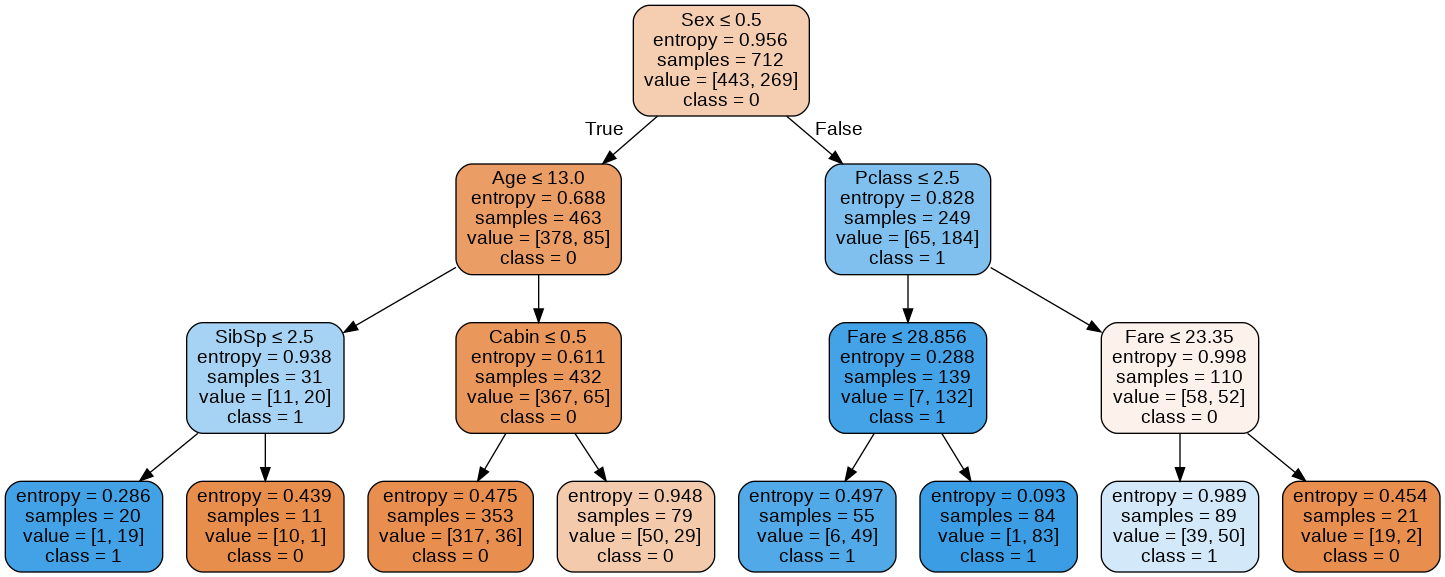

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survivor.png')
Image(graph.create_png())

### criterion2

creating a desicion tree model with gini criterion, max_depth=1 and random splitter

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini",splitter="random",max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(x_train,y_train)

#Predict the response for test dataset
y_pred2 = clf2.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print(" GINI with max-depth 3 and random splitter Accuracy:",metrics.accuracy_score(y_test, y_pred2))

 GINI with max-depth 3 and random splitter Accuracy: 0.776536312849162


visualizing

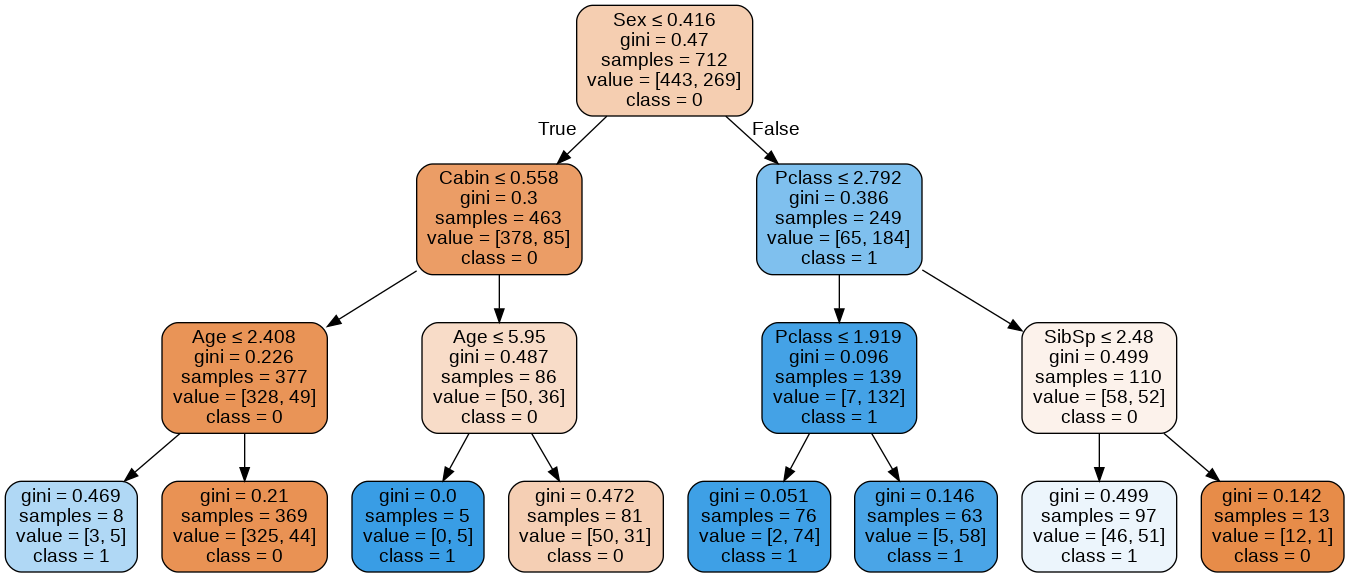

In [ ]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survivor2.png')
Image(graph.create_png())

# #criterion 3

gini criterion and no max depth

In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini",splitter="best")

# Train Decision Tree Classifer
clf3 = clf3.fit(x_train,y_train)

#Predict the response for test dataset
y_pred3 = clf3.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print(" GINI Accuracy with no max depth and best splitter:",metrics.accuracy_score(y_test, y_pred3))

 GINI Accuracy with no max depth and random splitter: 0.7541899441340782


visualizing

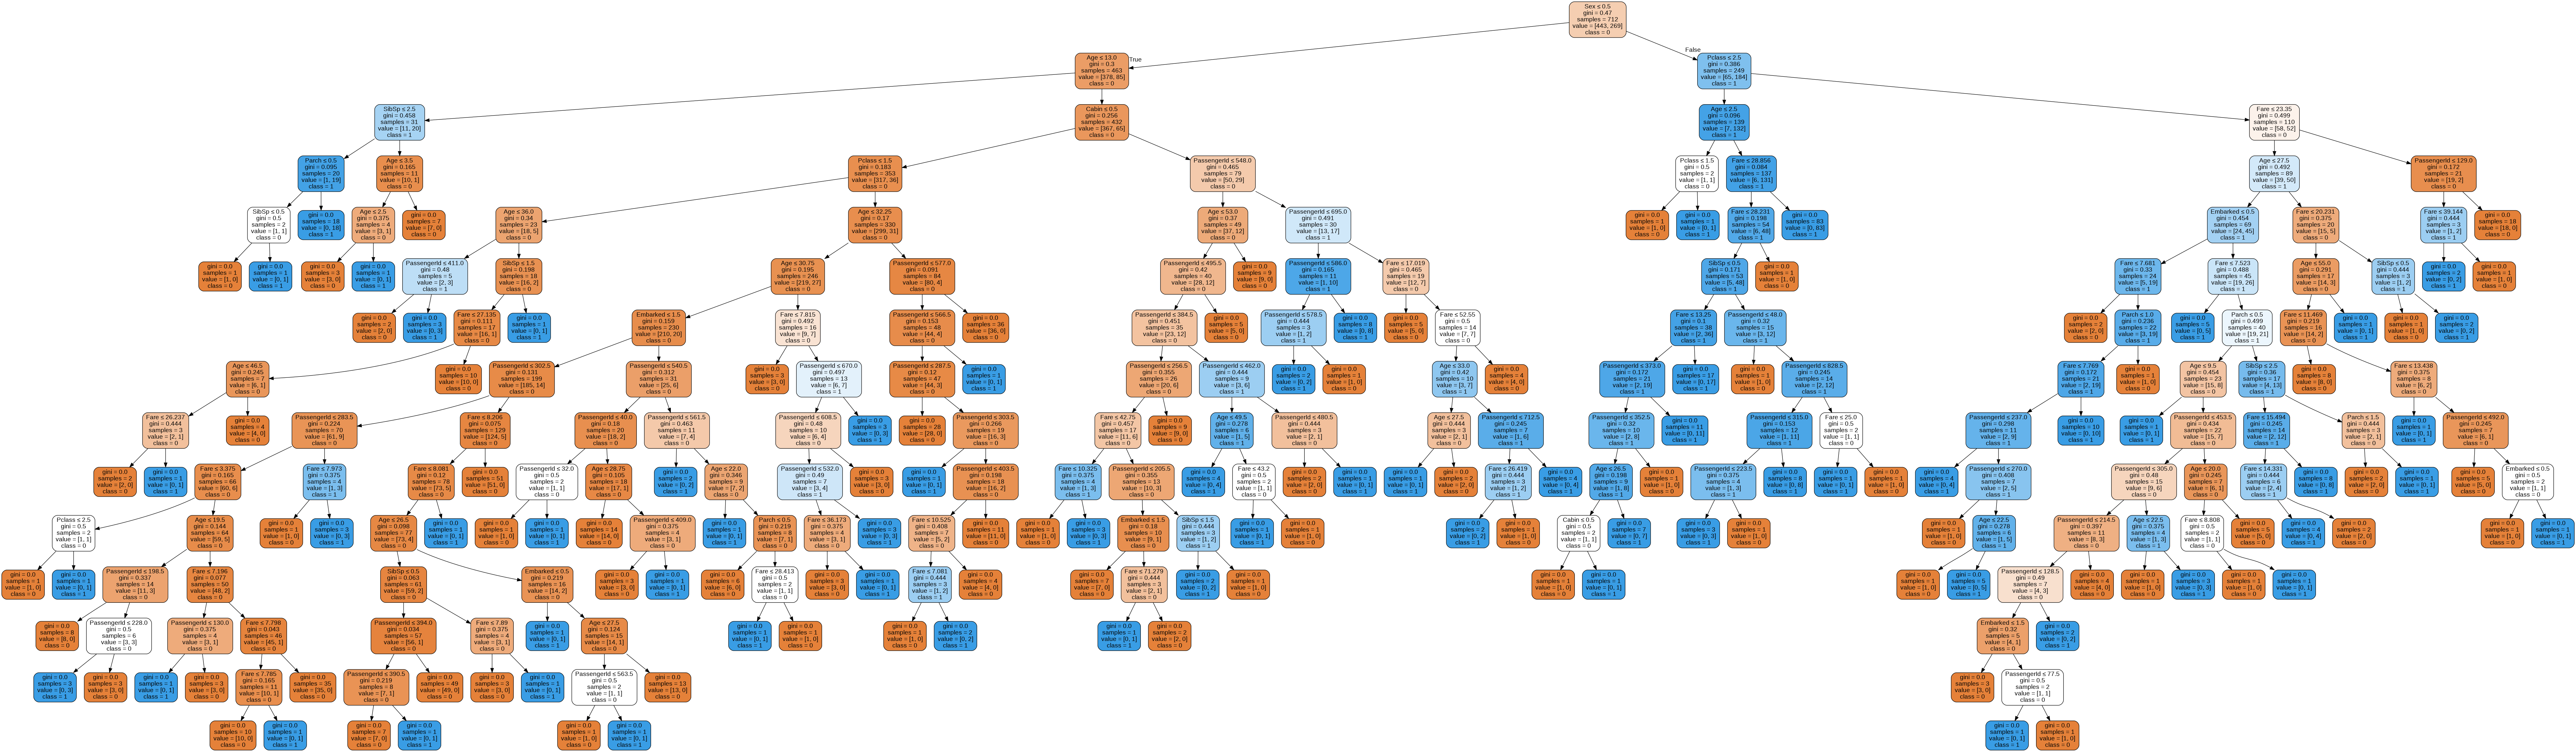

In [ ]:
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survivor3.png')
Image(graph.create_png())

# criterion4

entropy with  max depth=6 and best splitter

In [133]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=6)

# Train Decision Tree Classifer
clf4 = clf4.fit(x_train,y_train)

#Predict the response for test dataset
y_pred4 = clf4.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print(" entropy Accuracy with max depth 6 and best splitter:",metrics.accuracy_score(y_test, y_pred4))

 entropy Accuracy with max depth 6 and best splitter: 0.776536312849162


visualizing

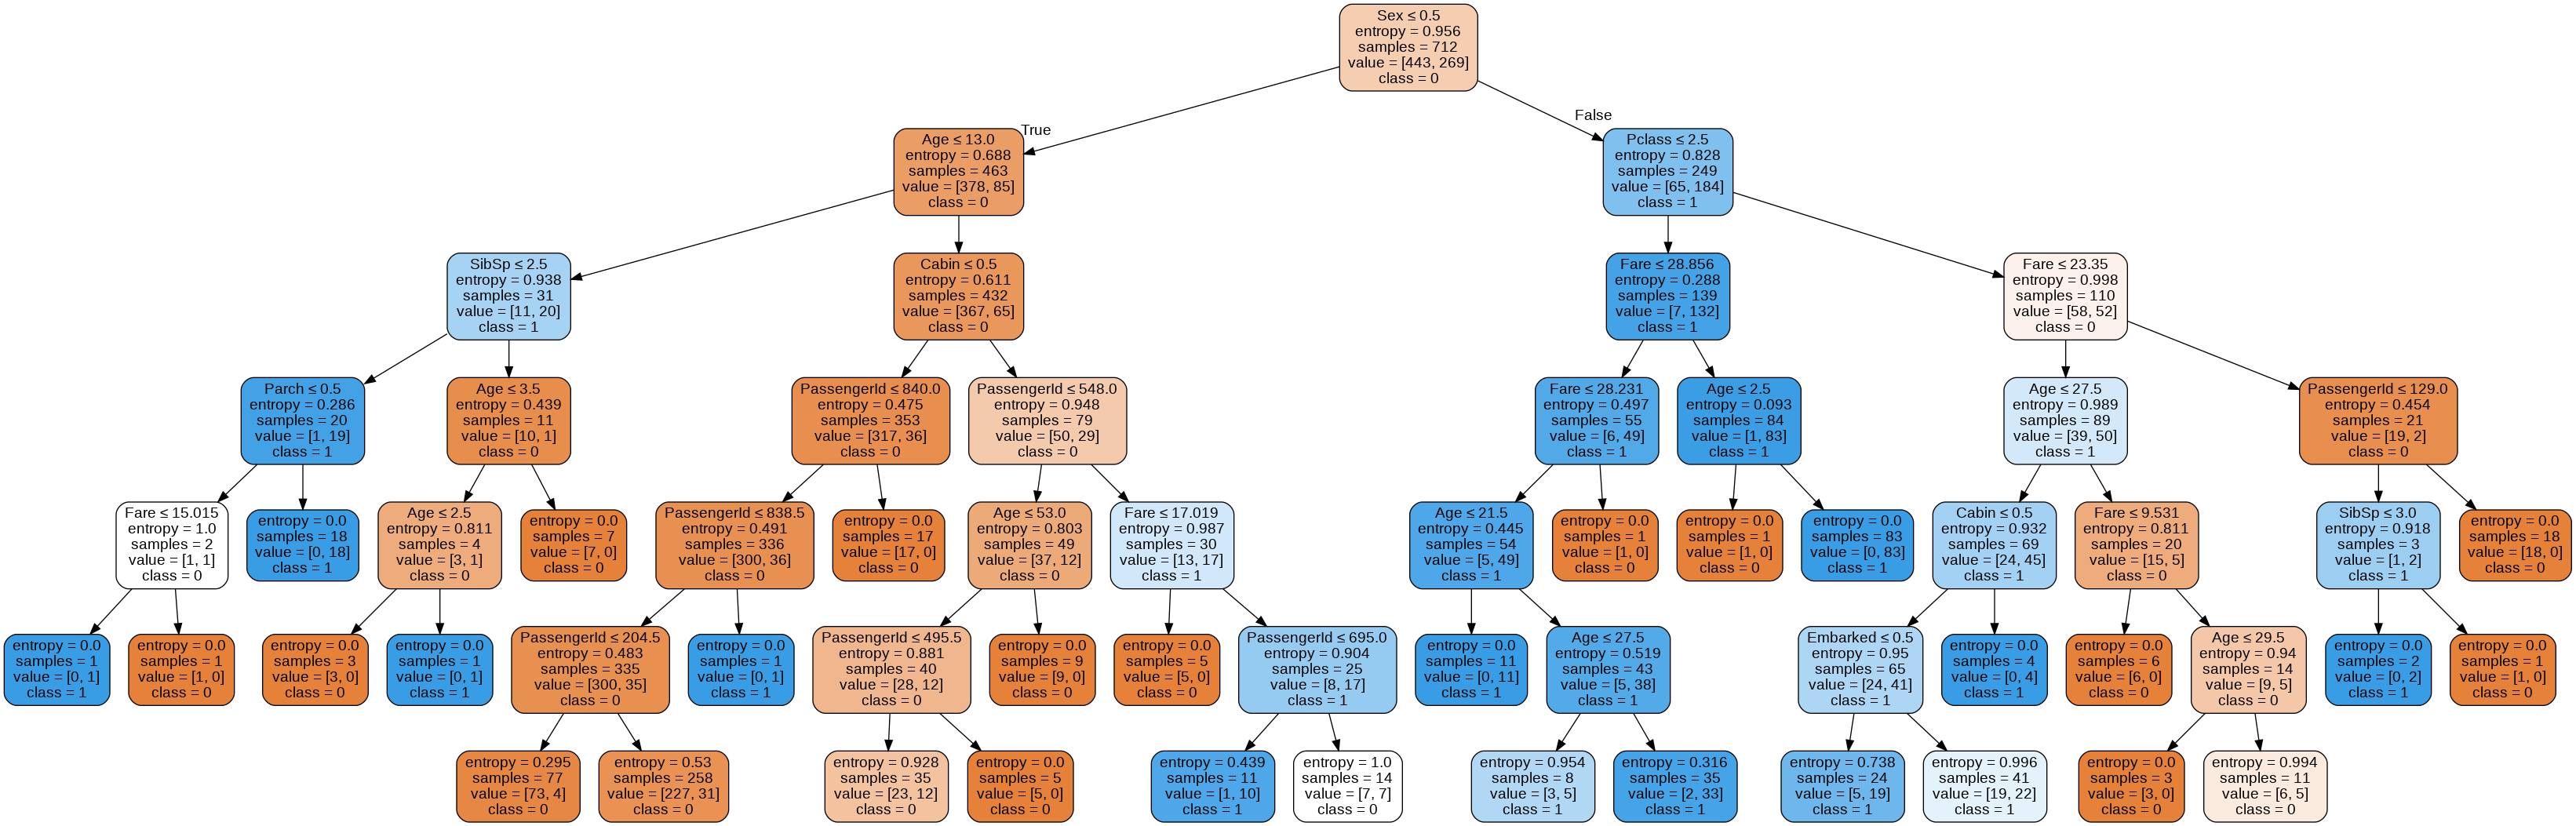

In [134]:
dot_data = StringIO()
export_graphviz(clf4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survivor4.png')
Image(graph.create_png())